#Name: Ganti Lakshmi Yasaswini

#Reg no: 21BEC7008

#Email: yasaswini.21bec7008@vitapstudent.ac.in

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [7]:
data = pd.read_csv('/content/sample_data/Titanic-Dataset.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [20]:
data.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [27]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [26]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [24]:
data.shape

(891, 12)

In [28]:
corr=data.corr()
corr

<ipython-input-28-e43ea23b92af>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=data.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<Axes: >

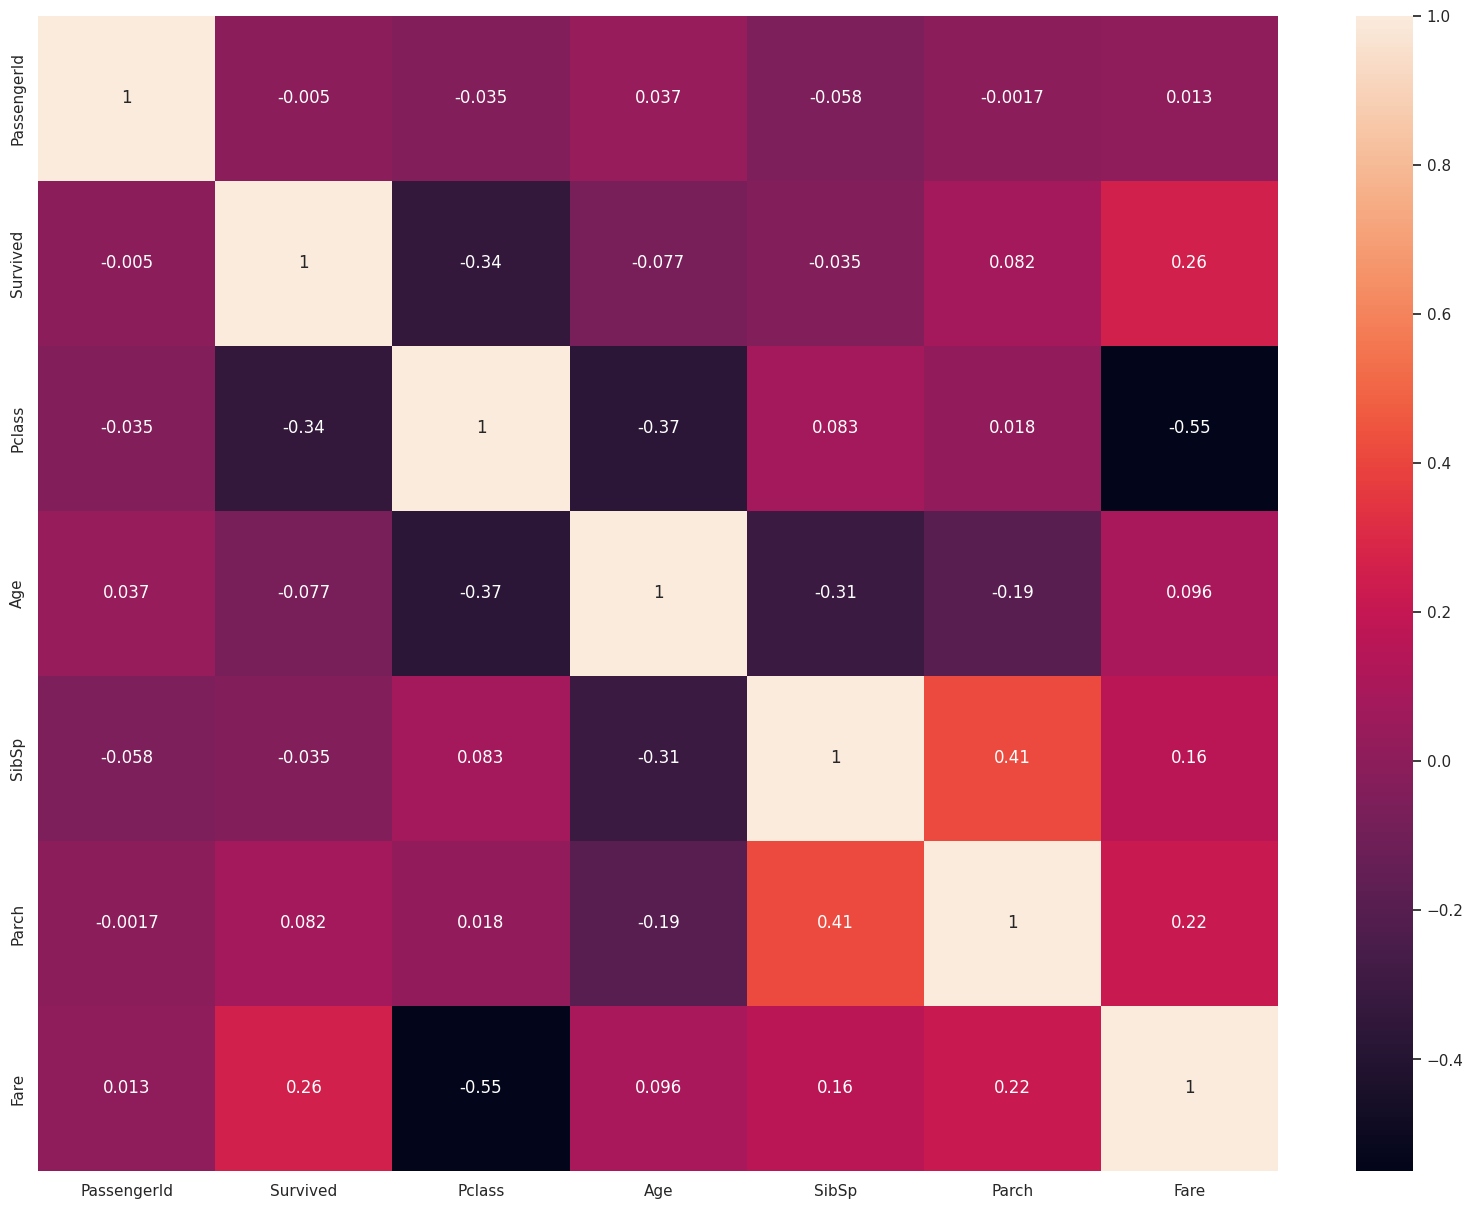

In [29]:
plt.subplots(figsize=(20,15))
sns.heatmap(corr,annot=True)

In [34]:
data.Age.value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

In [36]:
data.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

#Handling Null Values

In [37]:
data.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [38]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [40]:
data["Age"].fillna(data["Age"].mean(),inplace=True)

In [42]:
data["Cabin"].fillna(data["Cabin"].mode()[0],inplace=True)

In [43]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S


#Data Visualization

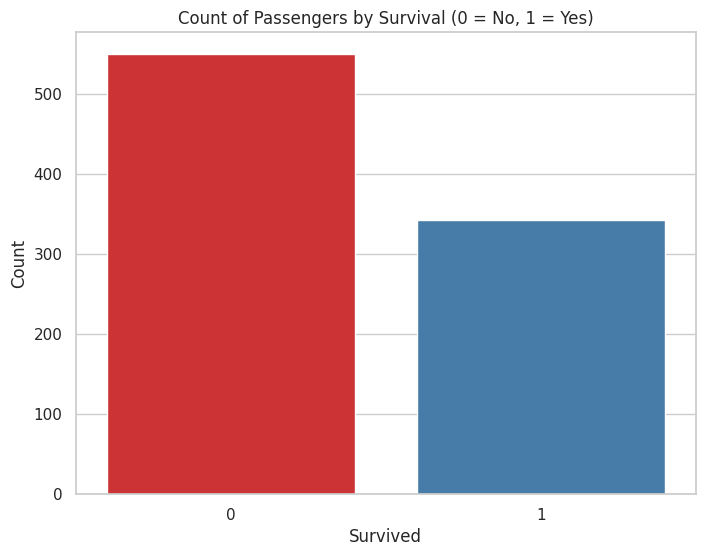

In [9]:
# Data Visualization

# Set the style for Seaborn plots
sns.set(style="whitegrid")

# Plot the count of passengers who survived and who didn't
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Survived', palette='Set1')
plt.title('Count of Passengers by Survival (0 = No, 1 = Yes)')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

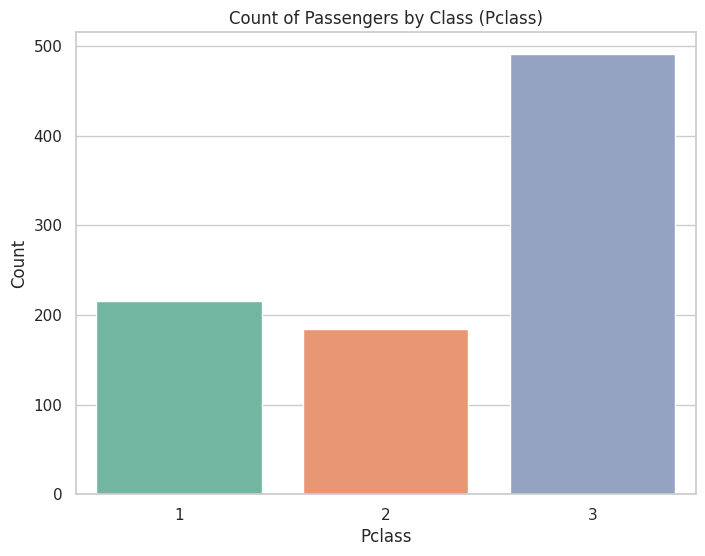

In [10]:
# Plot the count of passengers by their class (Pclass)
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Pclass', palette='Set2')
plt.title('Count of Passengers by Class (Pclass)')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.show()

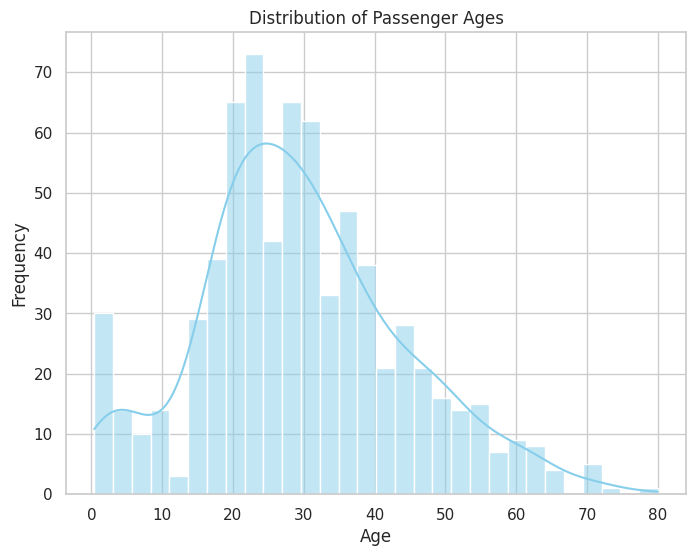

In [11]:
# Plot a histogram of passenger ages
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='Age', bins=30, kde=True, color='skyblue')
plt.title('Distribution of Passenger Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

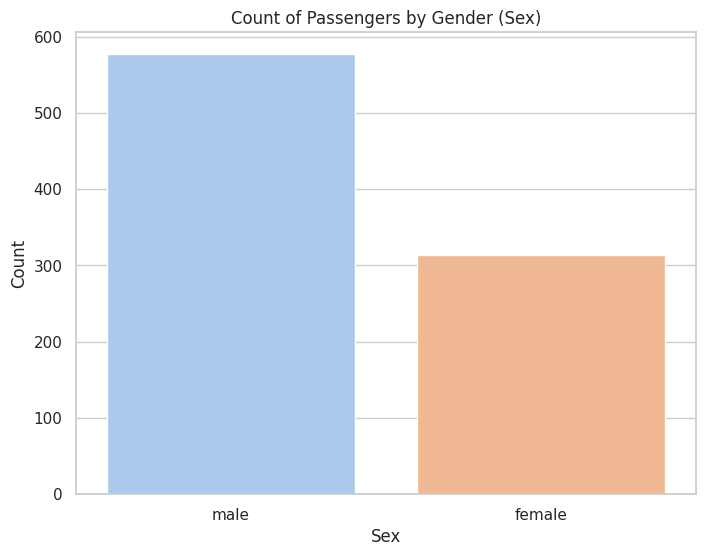

In [12]:
# Plot the count of passengers by gender (Sex)
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Sex', palette='pastel')
plt.title('Count of Passengers by Gender (Sex)')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

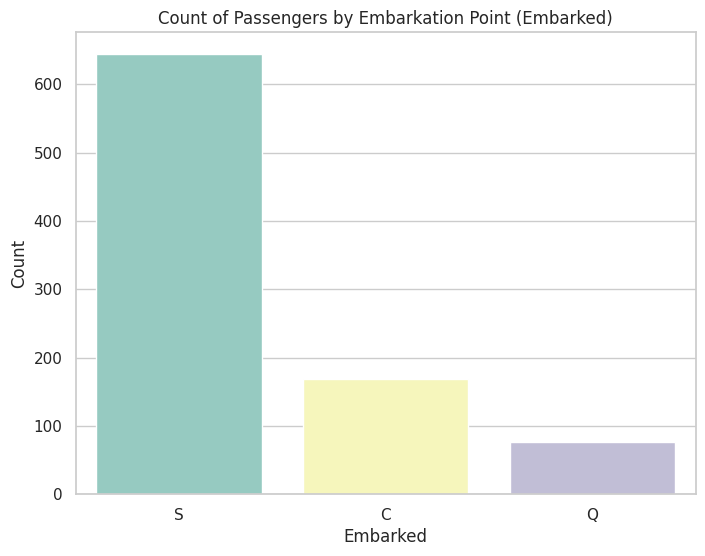

In [13]:
# Plot a bar chart of passengers' embarkation points (Embarked)
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Embarked', palette='Set3')
plt.title('Count of Passengers by Embarkation Point (Embarked)')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.show()

#Handling Outliers

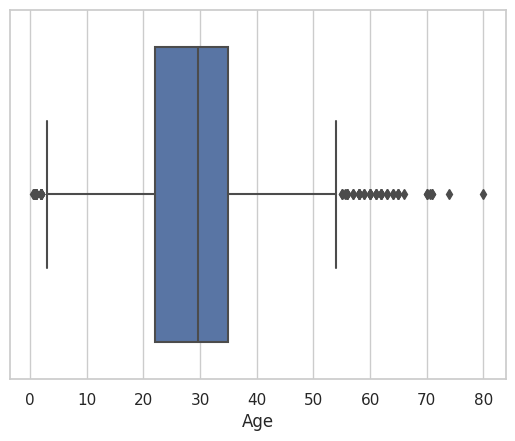

In [64]:
#outlier treatment
# Assuming 'Age' is the feature you want to handle outliers for

# Import necessary libraries
import seaborn as sns
import numpy as np

# Create a boxplot to visualize the distribution of 'Age'
sns.boxplot(data=data, x='Age')

# Calculate the first quartile (q1) and third quartile (q3)
q1 = data['Age'].quantile(0.25)
q3 = data['Age'].quantile(0.75)


In [65]:
# Print the values of q1 and q3
print("Q1 (25th percentile):", q1)
print("Q3 (75th percentile):", q3)

Q1 (25th percentile): 22.0
Q3 (75th percentile): 35.0


In [66]:
# Calculate the interquartile range (IQR)
IQR = q3 - q1

In [67]:
# Calculate the upper and lower limits for outliers
upper_limit = q3 + 1.5 * IQR
lower_limit = q1 - 1.5 * IQR

In [68]:
# Print the upper and lower limits
print("Upper Limit for Outliers:", upper_limit)
print("Lower Limit for Outliers:", lower_limit)

Upper Limit for Outliers: 54.5
Lower Limit for Outliers: 2.5


In [69]:
# Replace outliers with a specified value (e.g., 30 in this case)
data['Age'] = np.where(data['Age'] > upper_limit, 30, data['Age'])

<Axes: xlabel='Age'>

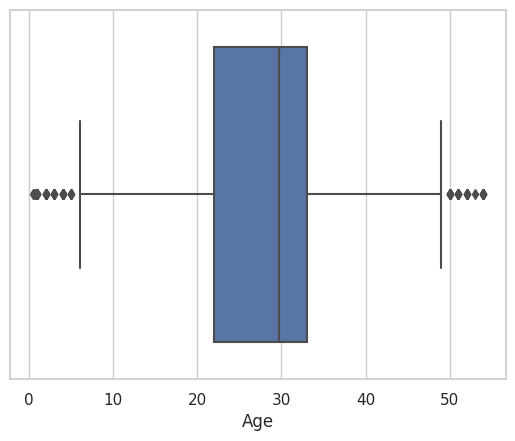

In [70]:
# Create a boxplot after handling outliers
plt.figure()
sns.boxplot(data=data, x='Age')

In [71]:
data.shape

(891, 12)

In [73]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,28.190700,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,10.772314,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,33.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,54.000000,8.000000,6.000000,512.329200


#splitting dependant and independant variables

In [44]:
x=data.iloc[:,3:13]
y=data.iloc[:,13:14]

In [45]:
x.head()

,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S


In [46]:
y.head()

""
0
1
2
3
4


In [47]:
data.shape

(891, 12)

In [48]:
x.shape

(891, 9)

In [49]:
y.shape

(891, 0)

#Encoding

In [50]:
from sklearn.preprocessing import LabelEncoder
# Example of Label Encoding for 'Sex'
le = LabelEncoder()
X['Sex'] = le.fit_transform(X['Sex'])

In [51]:
X['Sex']

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int64

In [53]:
X["Sex"].value_counts()

1    577
0    314
Name: Sex, dtype: int64

In [54]:
X["Sex"].nunique()

2

In [55]:
X.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",1,-0.530377,1,0,A/5 21171,-0.502445,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,0.571831,1,0,PC 17599,0.786845,C85,C
2,3,3,"Heikkinen, Miss. Laina",0,-0.254825,0,0,STON/O2. 3101282,-0.488854,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0.365167,1,0,113803,0.420730,C123,S
4,5,3,"Allen, Mr. William Henry",1,0.365167,0,0,373450,-0.486337,NaN,S


In [17]:
# Perform One-Hot Encoding for 'Sex' and 'Embarked'

# Use the Pandas get_dummies function to one-hot encode categorical columns
X_encoded = pd.get_dummies(X, columns=['Sex', 'Embarked'], drop_first=True)

X_encoded.head()


,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_1,Embarked_Q,Embarked_S
0,1,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,1,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,0,0
2,3,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,1
4,5,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,1,0,1


#Splitting dataset

In [19]:
#splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [56]:
X_train, X_test, y_train, y_test

(     PassengerId  Pclass                                Name  Sex       Age  \
 331          332       1                 Partner, Mr. Austen    1  1.088491   
 733          734       2          Berriman, Mr. William John    1 -0.461489   
 382          383       3                  Tikkanen, Mr. Juho    1  0.158503   
 704          705       3             Hansen, Mr. Henrik Juul    1 -0.254825   
 813          814       3  Andersson, Miss. Ebba Iris Alfrida    0 -1.632584   
 ..           ...     ...                                 ...  ...       ...   
 106          107       3    Salkjelsvik, Miss. Anna Kristine    0 -0.599265   
 270          271       1               Cairns, Mr. Alexander    1       NaN   
 860          861       3             Hansen, Mr. Claus Peter    1  0.778495   
 435          436       1           Carter, Miss. Lucile Polk    0 -1.081480   
 102          103       1           White, Mr. Richard Frasar    1 -0.599265   
 
      SibSp  Parch             Ticket 

#Feature Scaling

In [57]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [75]:
# Example of Feature Scaling for numerical columns
scaler = StandardScaler()
X[['Age', 'Fare']] = scaler.fit_transform(X[['Age', 'Fare']])

In [76]:
X[['Age', 'Fare']]

,Age,Fare
0,-0.530377,-0.502445
1,0.571831,0.786845
2,-0.254825,-0.488854
3,0.365167,0.420730
4,0.365167,-0.486337
...,...,...
886,-0.185937,-0.386671
887,-0.737041,-0.044381
888,NaN,-0.176263
889,-0.254825,-0.044381


In [77]:
numerical_columns = X_train.select_dtypes(include=['number']).columns
X_train = sc.fit_transform(X_train[numerical_columns])
X_test = sc.transform(X_test[numerical_columns])

In [78]:
X_train

array([[-0.45306593, -1.61413602,  0.7243102 , ..., -0.47072241,
        -0.47934164, -0.07868358],
       [ 1.11387354, -0.40055118,  0.7243102 , ..., -0.47072241,
        -0.47934164, -0.37714494],
       [-0.25427511,  0.81303367,  0.7243102 , ..., -0.47072241,
        -0.47934164, -0.47486697],
       ...,
       [ 1.60890168,  0.81303367,  0.7243102 , ...,  1.23056874,
        -0.47934164, -0.35580399],
       [-0.04768856, -1.61413602, -1.38062393, ...,  0.37992316,
         2.04874166,  1.68320121],
       [-1.34567573, -1.61413602,  0.7243102 , ..., -0.47072241,
         0.78470001,  0.86074761]])

In [63]:
X_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
709,710,3,"Moubarek, Master. Halim Gonios (""William George"")",1,NaN,1,1,2661,-0.341452,NaN,C
439,440,2,"Kvillner, Mr. Johan Henrik Johannesson",1,0.089615,0,0,C.A. 18723,-0.437007,NaN,S
840,841,3,"Alhomaki, Mr. Ilmari Rudolf",1,-0.668153,0,0,SOTON/O2 3101287,-0.488854,NaN,S
720,721,2,"Harper, Miss. Annie Jessie ""Nina""",0,-1.632584,0,1,248727,0.016023,NaN,S
39,40,3,"Nicola-Yarred, Miss. Jamila",0,-1.081480,1,0,2651,-0.422074,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...
433,434,3,"Kallio, Mr. Nikolai Erland",1,-0.874817,0,0,STON/O 2. 3101274,-0.504962,NaN,S
773,774,3,"Elias, Mr. Dibo",1,NaN,0,0,2674,-0.502949,NaN,C
25,26,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",0,0.571831,1,5,347077,-0.016444,NaN,S
84,85,2,"Ilett, Miss. Bertha",0,-0.874817,0,0,SO/C 14885,-0.437007,NaN,S
